### Data Preparation Notebook
This notebook showcases the step-by-step preparation of the dataset with detailed explanations.

In this section, we will focus on data transformation, cleansing and standardization.

In [126]:
# Importing pandas for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
# Load data file
data1 = pd.read_csv('Trips_ROP_transformed_2021_Q1.csv')
data2 = pd.read_csv('Trips_ROP_transformed_2020_Q4.csv')
data2.rename(columns={
    'Bucketdate': 'Bucket',
    'EndName': 'EndName',
    'Wochentag': 'Wochentag(d)',
    'Tageszeit': 'Tageszeit(h)',
    'Schulferien': 'Schulferien',
    'Distanz': 'Distanz',
    'Count(Zaehler)': 'Count'
}, inplace=True)
data = pd.concat([data1, data2], ignore_index=True)

**Explanation**: Loading the dataset and displaying the first few rows helps to understand the structure, column names, and data types.

According to the final dataset to be obtained, we need to rename the collones

In [128]:
# Renaming columns for consistency and ease of use
data.rename(columns={
    'StartName': 's_name',
    'EndName': 'e_name',
    'Wochentag(d)': 'weekday',
    'Tageszeit(h)': 'daytime',
    'Schulferien': 'isHoliday',
    'Distanz': 'distance',
    'Count': 'count'
}, inplace=True)

data.head(10)

,Bucket,s_name,e_name,weekday,daytime,isHoliday,distance,count
0,2021-03,Hunedoara(71171 - 03254026000002),Hunedoara(71171 - 03254026000007),Di,7,Keine Ferien,3,15
1,2021-03,Turda(80982 - 03241013050002),Turda(80982 - 03241013050008),Mi,17,Keine Ferien,0,10
2,2021-03,Turda(80982 - 03241013050007),Turda(80982 - 03241013030001),Sa,11,Keine Ferien,3,10
3,2021-03,Bran(91157 - 03254028001012),Bran(91157 - 03254028001004),Fr,13,Keine Ferien,0,15
4,2021-03,Bran(91157 - 03254028001003),Turda(80982 - 03241013070001),Fr,18,Keine Ferien,7,10
5,2021-03,Bran(91157 - 03254028001008),Bran(91157 - 03254028001013),So/Fe,14,Keine Ferien,0,30
6,2021-03,Hunedoara(71171 - 03254026000001),Turda(80982 - 03241013050002),Sa,9,Keine Ferien,7,10
7,2021-03,Hunedoara(71171 - 03254026000004),Hunedoara(71171 - 03254026000003),Mo,6,Keine Ferien,6,10
8,2021-03,Hunedoara(71171 - 03254026000015),Turda(80982 - 03241013070001),Fr,11,Keine Ferien,4,10
9,2021-03,Bran(91157 - 03254028001003),Hunedoara(71171 - 03254026000004),Mo,19,Keine Ferien,7,10


**Explanation**: Renaming columns makes them shorter and more intuitive, improving readability and reducing coding errors.

After merging the 2 datasets, we try to see if we have any duplicate rows, and we try to check if we do indeed have any duplicates.

In [129]:
# Check for duplicate rows and remove them if present
duplicates = data.duplicated().sum()
if duplicates > 0:
    data.drop_duplicates(inplace=True)
print(f"Number of duplicates removed: {duplicates}")

Number of duplicates removed: 0


**Explanation**: Removing duplicate rows ensures that the data is clean and prevents skewed analysis results.

In [130]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Bucket       0
s_name       0
e_name       0
weekday      0
daytime      0
isHoliday    0
distance     0
count        0
dtype: int64


**Explanation**: Checking for missing values helps identify potential issues that need addressing (e.g., filling or dropping rows).

In [131]:
# Extracting useful details from 'start_name' and 'end_name' columns
data['startClusterName'] = data['s_name'].str.extract(r'^(.*)\(')[0]
data['startClusterZip'] = data['s_name'].str.extract(r'\((\d{5})')[0]
data['startClusterID'] = data['s_name'].str.extract(r'(\d{14})\)$')[0]

data['endClusterName'] = data['e_name'].str.extract(r'^(.*)\(')[0]
data['endClusterZip'] = data['e_name'].str.extract(r'\((\d{5})')[0]
data['endClusterID'] = data['e_name'].str.extract(r'(\d{14})\)$')[0]

**Explanation**: Extracting components from complex columns like `start_name` and `end_name` helps in detailed analysis by providing location and cluster-specific information.

In [132]:
# Transforming 'Bucket' column to 'year' and 'month'
data['year'] = pd.to_datetime(data['Bucket'], format='%Y-%m').dt.year
data['month'] = pd.to_datetime(data['Bucket'], format='%Y-%m').dt.month
data.head()


,Bucket,s_name,e_name,weekday,daytime,isHoliday,distance,count,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,year,month
0,2021-03,Hunedoara(71171 - 03254026000002),Hunedoara(71171 - 03254026000007),Di,7,Keine Ferien,3,15,Hunedoara,71171,03254026000002,Hunedoara,71171,03254026000007,2021,3
1,2021-03,Turda(80982 - 03241013050002),Turda(80982 - 03241013050008),Mi,17,Keine Ferien,0,10,Turda,80982,03241013050002,Turda,80982,03241013050008,2021,3
2,2021-03,Turda(80982 - 03241013050007),Turda(80982 - 03241013030001),Sa,11,Keine Ferien,3,10,Turda,80982,03241013050007,Turda,80982,03241013030001,2021,3
3,2021-03,Bran(91157 - 03254028001012),Bran(91157 - 03254028001004),Fr,13,Keine Ferien,0,15,Bran,91157,03254028001012,Bran,91157,03254028001004,2021,3
4,2021-03,Bran(91157 - 03254028001003),Turda(80982 - 03241013070001),Fr,18,Keine Ferien,7,10,Bran,91157,03254028001003,Turda,80982,03241013070001,2021,3


In [133]:
# replacer_dict = {'Keine Ferien' : 0, 
#                  'Ferien' : 1}
# data['isHoliday'] = data['isHoliday'].replace(to_replace = replacer_dict)
# data['isHoliday'].unique()
# data.head()



In [134]:
# we delete the start date and end date because we had already separated their informations into simple numerical and nominals data
try:
    data = data.drop(columns=['s_name'])
    data = data.drop(columns=['e_name'])
    data = data.drop(columns=['Bucket'])
except Exception as e:
    print('les colonnes sont inexistantes')
data.head()

,weekday,daytime,isHoliday,distance,count,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,year,month
0,Di,7,Keine Ferien,3,15,Hunedoara,71171,03254026000002,Hunedoara,71171,03254026000007,2021,3
1,Mi,17,Keine Ferien,0,10,Turda,80982,03241013050002,Turda,80982,03241013050008,2021,3
2,Sa,11,Keine Ferien,3,10,Turda,80982,03241013050007,Turda,80982,03241013030001,2021,3
3,Fr,13,Keine Ferien,0,15,Bran,91157,03254028001012,Bran,91157,03254028001004,2021,3
4,Fr,18,Keine Ferien,7,10,Bran,91157,03254028001003,Turda,80982,03241013070001,2021,3


**Explanation**: Splitting the `Bucket` column into `year` and `month` enables time-based analysis.

In [135]:
# Creating the 'total' column (product of distance and count)
data['total'] = data['distance'] * data['count']

**Explanation**: The `total` column is created to calculate the total load of trips, which can be useful for aggregated analyses.

In [136]:
# Final inspection of the prepared data
data.head()

,weekday,daytime,isHoliday,distance,count,startClusterName,startClusterZip,startClusterID,endClusterName,endClusterZip,endClusterID,year,month,total
0,Di,7,Keine Ferien,3,15,Hunedoara,71171,03254026000002,Hunedoara,71171,03254026000007,2021,3,45
1,Mi,17,Keine Ferien,0,10,Turda,80982,03241013050002,Turda,80982,03241013050008,2021,3,0
2,Sa,11,Keine Ferien,3,10,Turda,80982,03241013050007,Turda,80982,03241013030001,2021,3,30
3,Fr,13,Keine Ferien,0,15,Bran,91157,03254028001012,Bran,91157,03254028001004,2021,3,0
4,Fr,18,Keine Ferien,7,10,Bran,91157,03254028001003,Turda,80982,03241013070001,2021,3,70


In [137]:
data['weekday'].unique()

array(['Di', 'Mi', 'Sa', 'Fr', 'So/Fe', 'Mo', 'Do', 'Donn', 'Mon', 'Sam'],
      dtype=object)

Le dictionnaire énumère les chaînes de caractères des jours de la semaine  qui doivent être normalisées et la chaîne de caractères par laquelle elles doivent être remplacées. 

In [138]:
data['isHoliday'].unique()

array(['Keine Ferien', 'Ferien'], dtype=object)

In [139]:
# Remplacement des variations des jours de la semaine
normalization_mapping = {
    'So/Fe': 'So',
    'Donn': 'Do',
    'Mon': 'Mo',
    'Sam': 'Sa'
}

# Appliquer la normalisation
data['weekday'] = data['weekday'].replace(normalization_mapping)

# Vérifier les nouvelles valeurs uniques
print(data['weekday'].unique())
# data['isHoliday'].unique()


['Di' 'Mi' 'Sa' 'Fr' 'So' 'Mo' 'Do']


Let's try to remove the outliers in our data by using the limits with the quantizer. We remove outliers just from the total column because it depends on distance and count so if we remove a row with an outlier from total then it will certainly remove outliers from the other 2.

In [140]:
# Assume data is your DataFrame and “total” the column of interest

# Outlier detection with IQR (interquartile range)
q1_total = data['total'].quantile(0.25)  # first quartil
q3_total = data['total'].quantile(0.75)  # third quartile
q1_count  = data['count'].quantile(0.25)  # first quartil
q3_count = data['count'].quantile(0.75)  # third quartile
q1_distance = data['distance'].quantile(0.25)  # first quartil
q3_distance = data['distance'].quantile(0.75)  # third quartile
iqr_total = q3_total - q1_total  # Interquartile range
iqr_count = q3_count - q1_count
iqr_distance = q3_distance - q1_distance

# Defining outlier limits
lower_bound_total = q1_total - 1.5 * iqr_total  # Limite inférieure
upper_bound_total = q3_total + 1.5 * iqr_total  # Limite supérieure
lower_bound_count = q1_count - 1.5 * iqr_count  
upper_bound_count = q3_count + 1.5 * iqr_count
lower_bound_distance = q1_distance - 1.5 * iqr_distance  
upper_bound_distance = q3_distance + 1.5 * iqr_distance

# Filter data to remove outliers
data_without_outliers = data[(data['total'] >= lower_bound_total) & (data['total'] <= upper_bound_total) &(data['count'] >= lower_bound_count)&(data['count'] <= upper_bound_count)&(data['distance'] >= lower_bound_distance)&(data['distance'] <= upper_bound_distance)]

# Display dimensions before and after filtering
print(f"Dimensions before filtrage : {data.shape}")
print(f"Dimensions after filtrage : {data_without_outliers.shape}")

Dimensions before filtrage : (277027, 14)
Dimensions after filtrage : (237487, 14)


We group the data by startClusterName category and display the total

In [141]:
df_total= data_without_outliers.groupby(data_without_outliers['startClusterName']).sum(numeric_only= True ) 
df_total

,daytime,distance,count,year,month,total
startClusterName,,,,,,
Bran,1354499,168782,1068265,205011382,682505,1611165
Hunedoara,913218,200123,716820,143625489,479264,1956595
Turda,845584,198845,690420,131199240,438573,1963840


We will now display the startClusterName by total using the bar chart. 

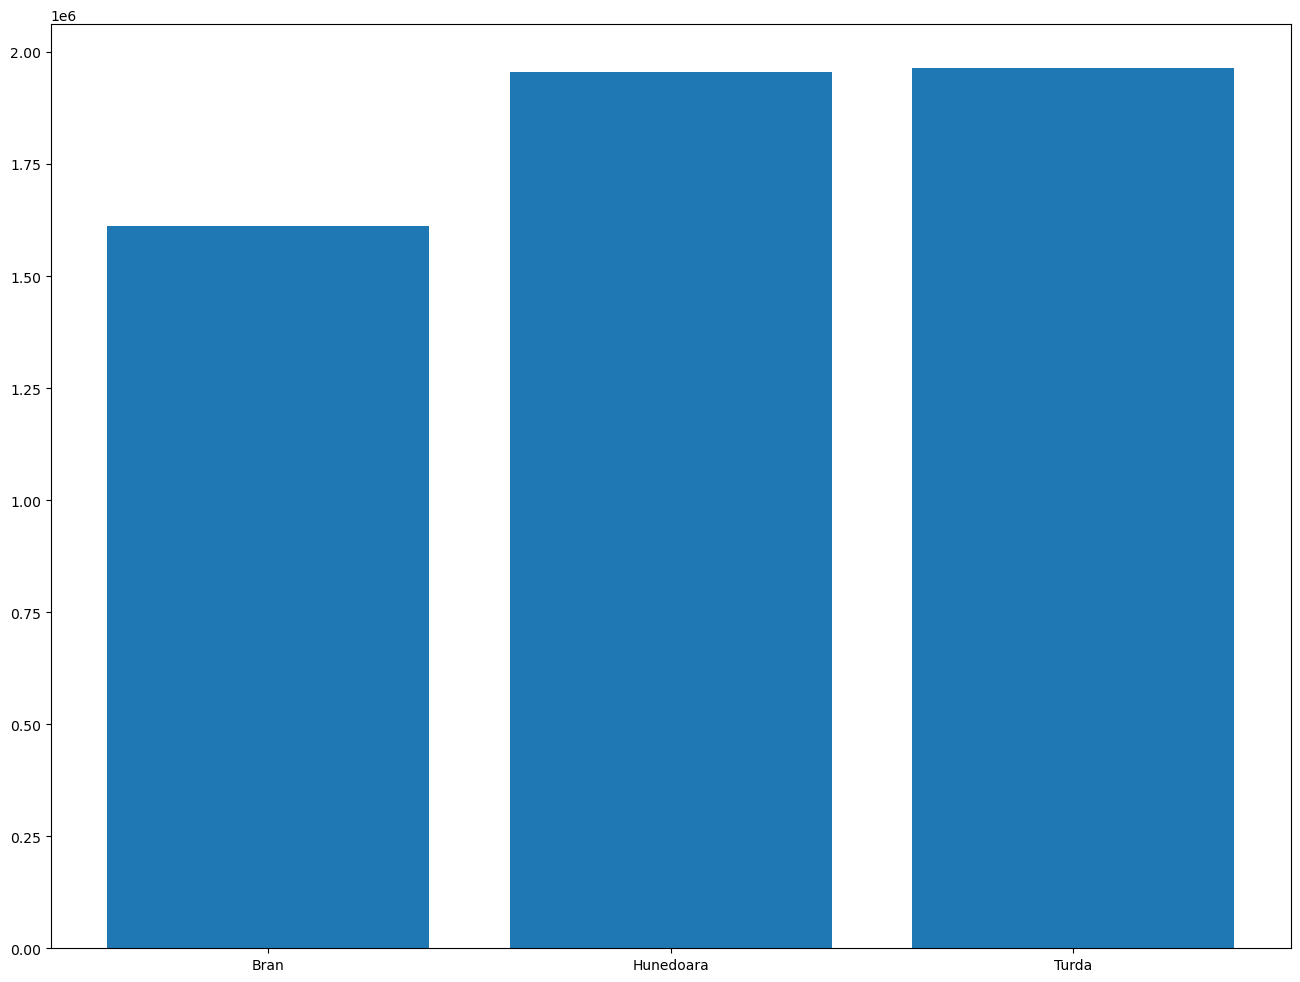

In [142]:
fig = plt.figure(figsize=[16,12])
plt.bar(df_total.index, df_total.total.values)

plt.show()

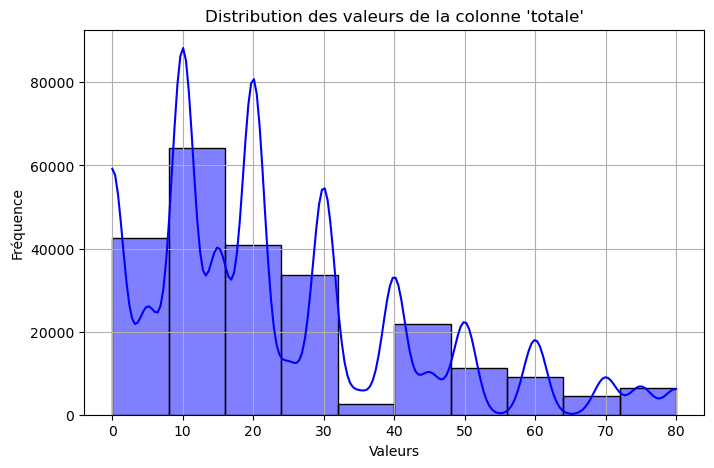

{'Minimum': 0,
 'Maximum': 80,
 'Moyenne': 23.292222311115978,
 'Médiane': 20.0,
 'Écart-type': 19.279981121555515,
 'Variance': 371.7176720475371,
 'Étendue interquartile (IQR)': 20.0}

In [143]:
#Let's display the dispersion values and the diagram for the total character.

data = data_without_outliers
# Calcul des paramètres de dispersion
minimum = data['total'].min()
maximum = data['total'].max()
mean = data['total'].mean()
median = data['total'].median()
std_dev = data['total'].std()  # Écart-type
variance = data['total'].var()  # Variance
iqr = data['total'].quantile(0.75) - data['total'].quantile(0.25)  # Étendue interquartile

# Affichage des paramètres
dispersion_params = {
    "Minimum": minimum,
    "Maximum": maximum,
    "Moyenne": mean,
    "Médiane": median,
    "Écart-type": std_dev,
    "Variance": variance,
    "Étendue interquartile (IQR)": iqr
}

# Visualisation de la distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['total'], kde=True, color='blue', bins=10, edgecolor='black')
plt.title("Distribution des valeurs de la colonne 'totale'")
plt.xlabel("Valeurs")
plt.ylabel("Fréquence")
plt.grid(True)
plt.show()

dispersion_params

In [144]:
data.describe()

,daytime,distance,count,year,month,total
count,237487.000000,237487.000000,237487.000000,237487.000000,237487.000000,237487.000000
mean,13.109353,2.390657,10.423750,2020.473167,6.738651,23.292222
std,4.113350,1.915088,4.113018,0.499281,4.542758,19.279981
min,0.000000,0.000000,5.000000,2020.000000,1.000000,0.000000
25%,10.000000,1.000000,10.000000,2020.000000,2.000000,10.000000
50%,13.000000,2.000000,10.000000,2020.000000,10.000000,20.000000
75%,16.000000,3.000000,10.000000,2021.000000,11.000000,30.000000
max,23.000000,8.000000,20.000000,2021.000000,12.000000,80.000000


In [145]:
# Saving the prepared data
data.to_csv('prepared_data.csv', index=False)


The aim of this exercise was to prepare and transform a dataset in such a way as to make it ready for in-depth analysis. Here's why this exercise is important:
Data Cleaning: Removing duplicates and dealing with missing values ensures that the dataset is clean and reliable, reducing bias in the analysis.Data Enrichment: Extracting sub-parts of complex columns, such as cluster names and zip codes, enables more targeted analyses (by region, by cluster, etc.).